In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
#data generation parameters
N=10000 # Observations in the population
n=1000  # Observations in each sample 
k=10   # Number of samples
m=3    # Number of models: Linear Regression, Random Forest, LSTM Neural Net
parameters = [N, n, k]

In [3]:
# Parameter for the simulation model
intercept = 0
beta1 = 1
beta2 = 1
beta3 = 1
error_sd = 1

In [4]:
# Generate exogene variables (including latent variables like prediction-error)
# rnorm draws random numbers from a normal distribution, 
# the arguments are rnorm(Number of random numbers, mean, sd) 


In [5]:
X1 = np.random.normal(0.0, 1.0, N) 
X2 = np.random.normal(0.0, 1.0, N) 
X3 = np.random.normal(0.0, 1.0, N) 
error = np.random.normal(0.0, error_sd, N)

In [6]:
# calculate endogene variables
Y = intercept+ beta1*X1+ beta2*X2+ beta3*X3 + error

In [7]:
# combine them in a data-frame
population = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Y': Y, 'error': error})

In [8]:
population.head()

,X1,X2,X3,Y,error
0,-0.755949,1.034721,0.754535,1.727019,0.693713
1,0.078379,-1.873401,0.487149,0.153466,1.461341
2,1.332183,-1.209118,0.262589,-0.919864,-1.305519
3,-0.562687,0.496001,-0.382049,-1.179288,-0.730554
4,0.450905,-2.419549,2.241250,2.140690,1.868085


In [9]:
index = random.sample(range(1, N), n)

In [10]:
samples_list = [[0]]*k
print(samples_list)
for i in range(0, k):
    index = random.sample(range(0, N), n)
    samples_list[i] = population.iloc[ index, :]
    samples_list[i].insert(0, 'sample_n', i)

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]


In [11]:
# For dataset(random sample) description
import statsmodels.api as sm

X = samples_list[0][['X1','X2', 'X3']] # here we have 3 variables for multiple regression
Y = samples_list[0]['Y']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1017.
Date:                Fri, 22 Nov 2019   Prob (F-statistic):          1.34e-302
Time:                        15:52:49   Log-Likelihood:                -1409.3
No. Observations:                1000   AIC:                             2827.
Df Residuals:                     996   BIC:                             2846.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0515      0.031     -1.642      0.1

/Users/oksanahrytsiv/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [12]:
def calculate_perform_metrics(y_test, y_pred):
    # Calculate mean squarred error (MSE)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    # Calculate mean absolute percentage error (MAPE)
    MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    # Calculate symmetric mean absolute percentage error (sMAPE)
    sMAPE = 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))        
    return MSE, MAPE, sMAPE
    

now we have k samples, each one with n observations, stored in the object samples_list

In [13]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics

# Next we want to fit a model on each sample
mlr = LinearRegression()
rf  = RandomForestRegressor()
gb  = GradientBoostingRegressor()

my_models_t1 = [mlr, rf, gb]

features = ['X1','X2', 'X3']
#---------------------------------------------------------
# Fit Linear Regression to all samples of Y1
#---------------------------------------------------------
MSE_mlr   = np.empty(k)
MAPE_mlr  = np.empty(k)
sMAPE_mlr = np.empty(k)

for i in range(0, k):
    samples_list[i] = pd.DataFrame(samples_list[i], columns = ['X1' , 'X2', 'X3', 'Y'])
    X = samples_list[i].drop('Y', axis = 1) # here we have 3 variables for multiple regression.
    Y = samples_list[i]['Y']
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
        
    my_models_t1[0].fit(X_train, y_train) #training the algorithm
    y_pred = my_models_t1[0].predict(X_test)
     
    MSE_mlr[i], MAPE_mlr[i], sMAPE_mlr[i] = calculate_perform_metrics(y_test, y_pred) 
         
scores_mlr = pd.DataFrame({'MSE': MSE_mlr, 'MAPE': MAPE_mlr, 'sMAPE': sMAPE_mlr})                                                                                            
scores_mlr.mean()        


MSE        0.989755
MAPE     201.624973
sMAPE     81.718183
dtype: float64

In [14]:
#---------------------------------------------------------
# Fit RandomForestRegressor to all samples of Y1
#---------------------------------------------------------

MSE_rf   = np.empty(k)
MAPE_rf  = np.empty(k)
sMAPE_rf = np.empty(k)

for i in range(0, k):
    samples_list[i] = pd.DataFrame(samples_list[i], columns = ['X1' , 'X2', 'X3', 'Y'])
    X = samples_list[i].drop('Y', axis = 1) # here we have 3 variables for multiple regression.
    Y = samples_list[i]['Y']
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
        
    my_models_t1[1].fit(X_train, y_train) #training the algorithm
    y_pred = my_models_t1[1].predict(X_test)
     
    MSE_mlr[i], MAPE_mlr[i], sMAPE_mlr[i] = calculate_perform_metrics(y_test, y_pred) 
         
scores_rf = pd.DataFrame({'MSE': MSE_mlr, 'MAPE': MAPE_mlr, 'sMAPE': sMAPE_mlr})                                                                                            
scores_rf.mean()        


/Users/oksanahrytsiv/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE        1.301155
MAPE     243.793797
sMAPE     88.495546
dtype: float64

In [15]:
#---------------------------------------------------------
# Fit GradientBoostingRegressor to all samples of Y1
#---------------------------------------------------------

MSE_gb   = np.empty(k)
MAPE_gb  = np.empty(k)
sMAPE_gb = np.empty(k)

for i in range(0, k):
    samples_list[i] = pd.DataFrame(samples_list[i], columns = ['X1' , 'X2', 'X3', 'Y'])
    X = samples_list[i].drop('Y', axis = 1) # here we have 3 variables for multiple regression.
    Y = samples_list[i]['Y']
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
        
    my_models_t1[2].fit(X_train, y_train) #training the algorithm
    y_pred = my_models_t1[2].predict(X_test)
     
    MSE_mlr[i], MAPE_mlr[i], sMAPE_mlr[i] = calculate_perform_metrics(y_test, y_pred) 
         
scores_rf_gb = pd.DataFrame({'MSE': MSE_mlr, 'MAPE': MAPE_mlr, 'sMAPE': sMAPE_mlr})                                                                                            
scores_rf_gb.mean()        

MSE        1.143393
MAPE     222.500572
sMAPE     86.246992
dtype: float64

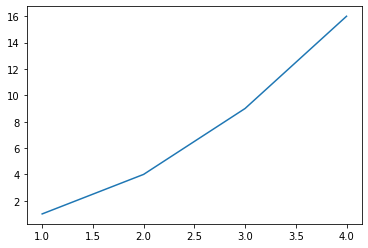

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([1,2,3,4], [1,4,9,16])
plt.show()